In [1]:
import pandas as pdf
import numpy as np
%matplotlib inline
from matplotlib import pyplot as p
from sklearn.linear_model import LogisticRegression

In [2]:
def cloud(references, tests, k):
    """
    reference: pd.DataFrame
        Should represent a distance matrix where rows and columns are indexed by reference sample ids
    tests: pd.DataFrame
        Should represent a distance matrix where row are indexed by reference sample ids and columns are indexed
        by tests sample ids
    k: int
        The number of k nearest neighbors to look at
    """
    reference_ids = references.columns.to_list()
    test_ids = tests.columns.to_list()
    # step 1
    r_di = []
    for reference in reference_ids:
        r_di.append(references[reference].nsmallest(k).mean())
        
    print(r_di)
    
    # step 2
    d_bar = np.array(r_di).mean()
    
    # step 3
    r_ri = [di/d_bar for di in r_di]
    
    # step 4
    t_di = []
    for test in test_ids:
        t_di.append(tests[test].nsmallest(k).mean())
    t_ri = [di/d_bar for di in t_di]

    # step 5
    total = 0
    anomalous = []
    for i, t_r in enumerate(t_ri):
        p = 0
        for r_r in r_ri:
            if r_r >= t_r:
                p += 1
        p /= len(r_ri)
        if p <= 0.05:
            total += 1
            anomalous.append(test_ids[i])
#     print(total, k, len(t_ri))
    
    return (anomalous)

In [3]:
distances = pd.read_csv("artifact_110218_021021-144748/BIOM/110218/distance-matrix.tsv", sep="\t", index_col=0)
# distances = pd.read_csv("artifact_110218_021021-144748/BIOM/110218/euclidean.tsv", sep="\t", index_col=0)
distances = distances.replace(0, np.nan)
distance_ids = distances.index.to_list()
samples = pd.read_csv("artifact_110218_021021-144748/BIOM/110218/sample.tsv", sep="\t", index_col=0)
samples = samples.loc[distance_ids]

In [4]:
# samples = samples.loc[(samples["env_package"] == "human-gut")]
# distances = distances.loc[samples.index.to_list()]

male = samples.loc[(samples["host"] == "M3")]
male_ids = male.index.to_list()

female = samples.loc[(samples["host"] == "F4")]
female_ids = female.index.to_list()

references = distances.loc[male_ids, male_ids]
tests = distances.loc[male_ids, female_ids]

In [7]:
for i in range(1,534):
    d = cloud(references, tests, i)

147 1 534
139 2 534
144 3 534
144 4 534
145 5 534
140 6 534
140 7 534
141 8 534
144 9 534
147 10 534
149 11 534
150 12 534
149 13 534
152 14 534
152 15 534
152 16 534
149 17 534
147 18 534
145 19 534
143 20 534
140 21 534
140 22 534
140 23 534
140 24 534
141 25 534
141 26 534
140 27 534
140 28 534
139 29 534
138 30 534
138 31 534
138 32 534
138 33 534
138 34 534
134 35 534
135 36 534
134 37 534
134 38 534
136 39 534
134 40 534
135 41 534
135 42 534
135 43 534
135 44 534
135 45 534
133 46 534
133 47 534
135 48 534
135 49 534
135 50 534
136 51 534
136 52 534
136 53 534
135 54 534
135 55 534
135 56 534
135 57 534
135 58 534
135 59 534
135 60 534
135 61 534
135 62 534
135 63 534
135 64 534
133 65 534
133 66 534
133 67 534
133 68 534
132 69 534
132 70 534
130 71 534
131 72 534
130 73 534
130 74 534
130 75 534
129 76 534
128 77 534
127 78 534
127 79 534
127 80 534
125 81 534
124 82 534
123 83 534
121 84 534
120 85 534
118 86 534
117 87 534
115 88 534
115 89 534
115 90 534
114 91 534
114 92 5

In [7]:
# with open("artifact_110218_021021-144748/BIOM/110218/ordination.txt") as f:
#     points = {}
#     for line in f.readlines():
#         info = line.split("\t")
#         points[info[0]] = np.array([float(n) for n in info[1:]])

In [12]:
# male_gut = []
# male_gut_ids = []
# for s in male.index.to_list():
#     male_gut.append(points[s])
#     male_gut_ids.append(s)
    
# female_gut = []
# for s in female.index.to_list():
#     female_gut.append(points[s])
    
# anom_gut = []
# anom_ids = []
# for s in male.index.to_list():
#     if s in d:
#         anom_gut.append(points[s])
#         anom_ids.append(s)


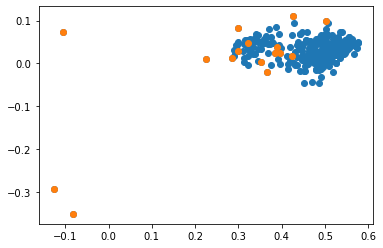

In [9]:
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection="2d")

# plt.scatter([x[0] for x in male_gut], [y[1] for y in male_gut])#, [z[2] for z in male_gut], c="blue" )
# plt.scatter([x[0] for x in anom_gut], [y[1] for y in anom_gut])#, [z[2] for z in anom_gut], c="red" )
# # ax.scatter([y[1] for y in female_gut], [x[0] for x in female_gut], [z[1] for z in female_gut], c="red" )

# plt.show()